In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection 

In [10]:
from sklearn.datasets import load_digits
digits=load_digits()

In [11]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
images= digits.images
target=digits.target
images.shape,target.shape

((1797, 8, 8), (1797,))

# Reshape Images

In [15]:
images=images.reshape((images.shape[0],-1))
images.shape

(1797, 64)

# 1.write a helper function to plot the image using matplotlib.

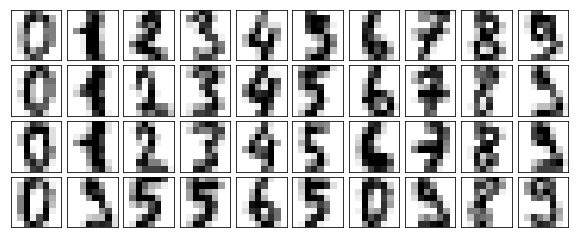

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,target,test_size=0.2,random_state=1)

In [18]:
X_train.shape,y_train.shape

((1437, 64), (1437,))

In [19]:
X_test.shape,y_test.shape

((360, 64), (360,))

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
y_pred=logmodel.predict(X_test)
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 8,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 3, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 8, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 3, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

   micro avg       0.97      0.97      0.97       360
   macro avg       

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9694444444444444


# Standardize the Data

In [24]:
from sklearn.preprocessing import StandardScaler
images = StandardScaler().fit_transform(images)

# PCA Projection to 2D

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(images)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(3)

,principal component 1,principal component 2
0,1.914230,-0.954368
1,0.588983,0.924665
2,1.302024,-0.317253


# Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [26]:
principalDf['target']=digits.target
principalDf.head()

,principal component 1,principal component 2,target
0,1.914230,-0.954368,0
1,0.588983,0.924665,1
2,1.302024,-0.317253,2
3,-3.020761,-0.868738,3
4,4.528966,-1.093371,4


# 3.Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

In [27]:
print(pca.explained_variance_ratio_)

[0.12033916 0.09561054]


# 4.Transform the dataset and fit a logistic regression and observe the accuracy.Compare it with the previous model and comment on the accuracy.

In [28]:
X=principalDf.drop('target',axis=1)
y=principalDf['target']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
y_pred=logmodel.predict(X_test)
y_pred

array([9, 3, 6, 7, 1, 0, 0, 1, 5, 4, 9, 2, 1, 9, 4, 0, 7, 3, 7, 4, 7, 1,
       9, 6, 0, 7, 6, 1, 9, 7, 9, 2, 3, 5, 2, 1, 9, 7, 7, 4, 7, 9, 6, 6,
       2, 7, 2, 7, 4, 2, 4, 3, 4, 0, 4, 7, 0, 0, 5, 3, 2, 7, 3, 0, 9, 9,
       5, 2, 2, 4, 6, 9, 7, 4, 7, 4, 2, 7, 7, 2, 1, 5, 2, 4, 2, 3, 5, 2,
       3, 2, 2, 2, 2, 7, 4, 5, 9, 7, 4, 2, 2, 9, 9, 3, 2, 0, 2, 3, 2, 3,
       2, 3, 2, 7, 9, 9, 6, 2, 0, 4, 1, 9, 4, 4, 7, 6, 7, 0, 6, 1, 7, 5,
       6, 3, 2, 3, 7, 2, 1, 7, 3, 4, 7, 1, 9, 6, 6, 0, 6, 3, 7, 6, 9, 6,
       2, 2, 2, 3, 0, 1, 6, 3, 6, 4, 1, 1, 6, 0, 6, 4, 0, 7, 9, 7, 4, 2,
       7, 9, 4, 0])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  1  0  0  2  0  5  0  0  0]
 [ 0  6  2  0  1  0  1  4  0  5]
 [ 0  1 17  2  0  0  0  0  0  1]
 [ 0  0  8  8  0  1  0  2  0  3]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 1  0  0  5  0  5  0  1  0  5]
 [ 3  0  0  0  0  0 13  0  0  0]
 [ 0  2  0  1  0  0  0 18  0  0]
 [ 0  4  3  1  0  2  0  1  0  4]
 [ 0  0  2  1  1  0  0  4  0  3]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.43      0.32      0.36        19
           2       0.53      0.81      0.64        21
           3       0.44      0.36      0.40        22
           4       0.82      1.00      0.90        18
           5       0.62      0.29      0.40        17
           6       0.68      0.81      0.74        16
           7       0.60      0.86      0.71        21
           8       0.00      0.00      0.00        15
           9       0.14      0.27      0.19        11

   micro avg       0.56      0.56      0.56       180
   macro avg       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5555555555555556


# Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [34]:
# print message text for the false positives (incorrectly classified )

X_test[y_pred > y_test]

,principal component 1,principal component 2
1227,-0.656746,-0.034263
202,1.614961,-2.869256
264,-0.960530,-0.074519
248,-0.116770,0.152594
659,-1.829535,-0.641781
1489,-0.536029,-0.395370
1548,-1.530668,1.416335
654,-1.373264,-0.323146
227,2.594008,2.390976
846,-0.132662,2.081567


In [35]:
# print message text for the false negatives ( incorrectly classified )

X_test[y_pred < y_test]


,principal component 1,principal component 2
1576,-5.111266,2.775885
598,2.080568,-2.264398
1728,1.324969,1.491362
1629,1.440340,-2.280676
655,5.370468,4.995970
361,-0.434202,3.861043
1488,-4.342763,0.012616
1685,-2.824268,0.560403
898,0.895540,1.652442
1028,-2.467929,-0.298968


Digit along with Predicted and Original label= 0


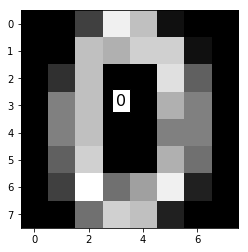

Digit along with Predicted and Original label= 2


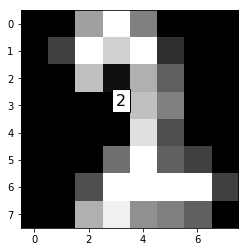

Digit along with Predicted and Original label= 0


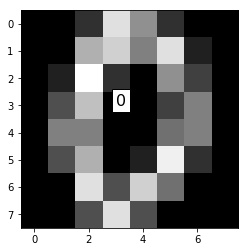

Digit along with Predicted and Original label= 1


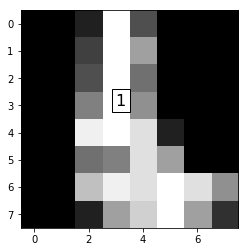

Digit along with Predicted and Original label= 5


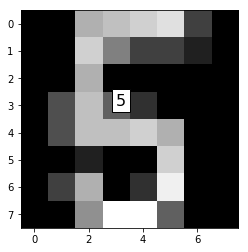

In [172]:
for i in np.random.randint(0, high=len(X_test), size=(5,)):
         # grab the image and classify it
         image = X_test[i]
            #Calculate Prediction
         prediction = logmodel.predict([image])[0]
         imgdata = np.array(image, dtype='float')
            # convert the image for a 64-dim array to an 8 x 8 image
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         #plot the digit along with predicted and original label
         print("Digit along with Predicted and Original label= {}".format(prediction))
         
         plt.show()
        